## Comparing the average monthly UV index by cities

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

To compare the monthly averages for the main cities in Australia, the csv's of monthly UV averages of the last 5 years are obtained and merged.
Note: UV Index data for Tasmania was conducted in Kingston, which is 13km from Hobart

In [2]:
#Reading in csv of average monthly UV index for each city
#Each city had grouped the average UV for each month for years 2017-2021
#Mean of each year's average was taken and plotted on new "mean" column
#CSV obtained via the data.gov.au
#CVS below created and cleaned from data.gov.au. Prepared in each city folders
mel = "Output/melb_df.csv"
syd = "Output/syd_df.csv"
bri = "Output/bris_df.csv"
per = "Output/per_df.csv"
tas = "Output/tas_df.csv"
dar = "Output/dar_df.csv"
ade = "Output/adel_df.csv"
can = "Output/canb_df.csv"


mel_df = pd.read_csv(mel, encoding="UTF-8")
syd_df = pd.read_csv(syd, encoding="UTF-8")
bri_df = pd.read_csv(bri, encoding="UTF-8")
per_df = pd.read_csv(per, encoding="UTF-8")
tas_df = pd.read_csv(tas, encoding="UTF-8")
dar_df = pd.read_csv(dar, encoding="UTF-8")
ade_df = pd.read_csv(ade, encoding="UTF-8")
can_df = pd.read_csv(can, encoding="UTF-8")

Obtaining month and mean columns for each city

In [3]:
#Extracting month and 5 year mean columns to compare
mel_df = mel_df[['month','mean']]
syd_df = syd_df[['month','mean']]
bri_df = bri_df[['month','mean']]
per_df = per_df[['month','mean']]
tas_df = tas_df[['month','mean']]
dar_df = dar_df[['month','mean']]
ade_df = ade_df[['month','mean']]
can_df = can_df[['month','mean']]

Merging the 'month' column and mean for each city below. Then rename each city to corresponding column

In [4]:
# Merge the first two datasets on "month" so that no data is lost
combined_df = pd.merge(mel_df, syd_df,
                                 how='outer', on='month')

# Rename our columns to corresponding cities
combined_df = combined_df.rename(columns={"mean_x":"Mel",
                                            "mean_y":"Syd"})
combined_df

,month,Mel,Syd
0,1,4.129310,4.171049
1,2,3.450480,3.733208
2,3,2.467986,2.532758
3,4,1.374699,1.823317
4,5,0.727605,1.093087
5,6,0.509512,0.705864
6,7,0.556154,0.861411
7,8,0.861914,1.271088
8,9,1.453326,1.971036
9,10,2.218698,2.634960


In [5]:
# Merge the rest of datasets and rename columns
combined_df = pd.merge(combined_df, bri_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Bris"})
combined_df

,month,Mel,Syd,Bris
0,1,4.129310,4.171049,4.677384
1,2,3.450480,3.733208,3.968964
2,3,2.467986,2.532758,2.960864
3,4,1.374699,1.823317,2.258405
4,5,0.727605,1.093087,1.555809
5,6,0.509512,0.705864,1.187452
6,7,0.556154,0.861411,1.326478
7,8,0.861914,1.271088,1.873740
8,9,1.453326,1.971036,2.614490
9,10,2.218698,2.634960,3.011070


In [6]:
combined_df = pd.merge(combined_df, per_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Per"})
combined_df

,month,Mel,Syd,Bris,Per
0,1,4.129310,4.171049,4.677384,5.358262
1,2,3.450480,3.733208,3.968964,4.430629
2,3,2.467986,2.532758,2.960864,3.206269
3,4,1.374699,1.823317,2.258405,2.104522
4,5,0.727605,1.093087,1.555809,1.192238
5,6,0.509512,0.705864,1.187452,0.829247
6,7,0.556154,0.861411,1.326478,0.856096
7,8,0.861914,1.271088,1.873740,1.292200
8,9,1.453326,1.971036,2.614490,2.035275
9,10,2.218698,2.634960,3.011070,2.979525


In [7]:
combined_df = pd.merge(combined_df, tas_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Tas"})
combined_df

,month,Mel,Syd,Bris,Per,Tas
0,1,4.129310,4.171049,4.677384,5.358262,3.723306
1,2,3.450480,3.733208,3.968964,4.430629,2.945155
2,3,2.467986,2.532758,2.960864,3.206269,1.962866
3,4,1.374699,1.823317,2.258405,2.104522,1.023717
4,5,0.727605,1.093087,1.555809,1.192238,0.449633
5,6,0.509512,0.705864,1.187452,0.829247,0.302286
6,7,0.556154,0.861411,1.326478,0.856096,0.354643
7,8,0.861914,1.271088,1.873740,1.292200,0.597555
8,9,1.453326,1.971036,2.614490,2.035275,1.114005
9,10,2.218698,2.634960,3.011070,2.979525,1.835769


In [8]:
combined_df = pd.merge(combined_df, dar_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Dar"})
combined_df

,month,Mel,Syd,Bris,Per,Tas,Dar
0,1,4.129310,4.171049,4.677384,5.358262,3.723306,4.050221
1,2,3.450480,3.733208,3.968964,4.430629,2.945155,4.376498
2,3,2.467986,2.532758,2.960864,3.206269,1.962866,4.359357
3,4,1.374699,1.823317,2.258405,2.104522,1.023717,3.813803
4,5,0.727605,1.093087,1.555809,1.192238,0.449633,3.279171
5,6,0.509512,0.705864,1.187452,0.829247,0.302286,2.867776
6,7,0.556154,0.861411,1.326478,0.856096,0.354643,3.064265
7,8,0.861914,1.271088,1.873740,1.292200,0.597555,3.635484
8,9,1.453326,1.971036,2.614490,2.035275,1.114005,4.148261
9,10,2.218698,2.634960,3.011070,2.979525,1.835769,4.345131


In [9]:
combined_df = pd.merge(combined_df, ade_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Ade"})
combined_df

,month,Mel,Syd,Bris,Per,Tas,Dar,Ade
0,1,4.129310,4.171049,4.677384,5.358262,3.723306,4.050221,4.814235
1,2,3.450480,3.733208,3.968964,4.430629,2.945155,4.376498,4.131239
2,3,2.467986,2.532758,2.960864,3.206269,1.962866,4.359357,2.986083
3,4,1.374699,1.823317,2.258405,2.104522,1.023717,3.813803,1.815274
4,5,0.727605,1.093087,1.555809,1.192238,0.449633,3.279171,0.920614
5,6,0.509512,0.705864,1.187452,0.829247,0.302286,2.867776,0.673565
6,7,0.556154,0.861411,1.326478,0.856096,0.354643,3.064265,0.721434
7,8,0.861914,1.271088,1.873740,1.292200,0.597555,3.635484,1.087832
8,9,1.453326,1.971036,2.614490,2.035275,1.114005,4.148261,1.860204
9,10,2.218698,2.634960,3.011070,2.979525,1.835769,4.345131,2.626603


In [10]:
combined_df = pd.merge(combined_df, can_df,
                                 how='outer', on='month')

combined_df = combined_df.rename(columns={"mean":"Can"})
combined_df

,month,Mel,Syd,Bris,Per,Tas,Dar,Ade,Can
0,1,4.129310,4.171049,4.677384,5.358262,3.723306,4.050221,4.814235,4.120118
1,2,3.450480,3.733208,3.968964,4.430629,2.945155,4.376498,4.131239,3.691662
2,3,2.467986,2.532758,2.960864,3.206269,1.962866,4.359357,2.986083,2.579866
3,4,1.374699,1.823317,2.258405,2.104522,1.023717,3.813803,1.815274,1.699189
4,5,0.727605,1.093087,1.555809,1.192238,0.449633,3.279171,0.920614,0.925813
5,6,0.509512,0.705864,1.187452,0.829247,0.302286,2.867776,0.673565,0.612921
6,7,0.556154,0.861411,1.326478,0.856096,0.354643,3.064265,0.721434,0.702285
7,8,0.861914,1.271088,1.873740,1.292200,0.597555,3.635484,1.087832,1.077346
8,9,1.453326,1.971036,2.614490,2.035275,1.114005,4.148261,1.860204,1.739819
9,10,2.218698,2.634960,3.011070,2.979525,1.835769,4.345131,2.626603,2.524841


Plotting the graph where the x-axis is for Months and y-axis is for UV Index

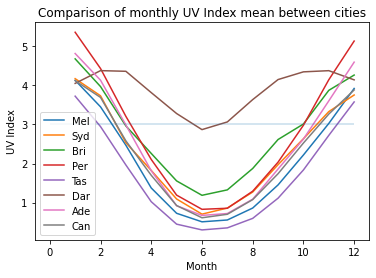

In [24]:
#Graph is saved in the Images file. Along with the individual graphs of monthly means for each city
plt.plot(combined_df['month'], combined_df['Mel'], label="Mel") 
plt.plot(combined_df['month'], combined_df['Syd'], label="Syd")
plt.plot(combined_df['month'], combined_df['Bris'], label="Bri")
plt.plot(combined_df['month'], combined_df['Per'], label="Per")
plt.plot(combined_df['month'], combined_df['Tas'], label='Tas')
plt.plot(combined_df['month'], combined_df['Dar'], label='Dar')
plt.plot(combined_df['month'], combined_df['Ade'], label='Ade')
plt.plot(combined_df['month'], combined_df['Can'], label='Can')
plt.xlabel("Month")
plt.ylabel("UV Index")
plt.title("Comparison of monthly UV Index mean between cities")
plt.legend()
plt.hlines(3, 0, 12, alpha=0.25)
plt.savefig("Images/ResultsMonthsMean.png")
plt.show()

The results of the graph shows the higher averages of UV index in the months of January, February and December. This is obviously during the summer months in Australia.
Perth is shown to have the highest UV out of any city throughout summer, whilst in Tasmanis has the lowest. 
Although the highest UV point for Darwin is slightly less than Perth, the city had the highest UV average throughout the year compared to the rest of the cities.

## Comparing the Max UV Index per time of day for cities

In [12]:
#CSV of each city's UV index was indexed by time of day
#Then max UV for each hour was taken for years 2017-2021
#Data merged into Output file and read here
#CSV obtained via the data.gov.au
#CVS below created and cleaned from data.gov.au and prepared in each city folders
mel1 = "Output/melb_hour.csv"
syd1 = "Output/syd_hour.csv"
bri1 = "Output/bris_hour.csv"
per1 = "Output/perth_hour.csv"
tas1 = "Output/tas_hour.csv"
dar1 = "Output/darw_hour.csv"
ade1 = "Output/adel_hour.csv"
can1 = "Output/can_hour.csv"


mel1_df = pd.read_csv(mel1, encoding="UTF-8")
syd1_df = pd.read_csv(syd1, encoding="UTF-8")
bri1_df = pd.read_csv(bri1, encoding="UTF-8")
per1_df = pd.read_csv(per1, encoding="UTF-8")
tas1_df = pd.read_csv(tas1, encoding="UTF-8")
dar1_df = pd.read_csv(dar1, encoding="UTF-8")
ade1_df = pd.read_csv(ade1, encoding="UTF-8")
can1_df = pd.read_csv(can1, encoding="UTF-8")

Extracting the hour and max UV index for each hour compiled for each city. 
This is to compare the max UV for time of day in each city

In [13]:
#Extracting hour and mean column to display max UV Index per city during times of day
mel1_df = mel1_df[['hour','mean']]
syd1_df = syd1_df[['hour','mean']]
bri1_df = bri1_df[['hour','mean']]
per1_df = per1_df[['hour','mean']]
tas1_df = tas1_df[['hour','mean']]
dar1_df = dar1_df[['hour','mean']]
ade1_df = ade1_df[['hour','mean']]
can1_df = can1_df[['hour','mean']]

Merge data from each city to create a new dataframe

In [14]:
# Merge the first two datasets on "hour" so that no data is lost
combined1_df = pd.merge(mel1_df, syd1_df,
                                 how='outer', on='hour')

# Rename our columns
combined1_df = combined1_df.rename(columns={"mean_x":"Mel",
                                            "mean_y":"Syd"})
combined1_df

,hour,Mel,Syd
0,0,0.018,0.018
1,1,0.014,0.026
2,2,0.016,0.018
3,3,0.012,0.018
4,4,0.030,0.052
5,5,0.354,0.466
6,6,1.286,1.710
7,7,3.092,4.072
8,8,5.618,7.256
9,9,8.846,10.768


In [15]:
# Merge the rest of datasets and rename columns
# Continue process for all of the cities below
combined1_df = pd.merge(combined1_df, bri1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Bris"})
combined1_df

,hour,Mel,Syd,Bris
0,0,0.018,0.018,0.010
1,1,0.014,0.026,0.010
2,2,0.016,0.018,0.010
3,3,0.012,0.018,0.010
4,4,0.030,0.052,0.030
5,5,0.354,0.466,0.398
6,6,1.286,1.710,1.722
7,7,3.092,4.072,4.328
8,8,5.618,7.256,7.828
9,9,8.846,10.768,11.556


In [16]:
combined1_df = pd.merge(combined1_df, per1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Per"})
combined1_df

,hour,Mel,Syd,Bris,Per
0,0,0.018,0.018,0.010,0.010
1,1,0.014,0.026,0.010,0.010
2,2,0.016,0.018,0.010,0.010
3,3,0.012,0.018,0.010,0.010
4,4,0.030,0.052,0.030,0.016
5,5,0.354,0.466,0.398,0.220
6,6,1.286,1.710,1.722,1.058
7,7,3.092,4.072,4.328,2.876
8,8,5.618,7.256,7.828,5.624
9,9,8.846,10.768,11.556,8.934


In [17]:
combined1_df = pd.merge(combined1_df, tas1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Tas"})
combined1_df

,hour,Mel,Syd,Bris,Per,Tas
0,0,0.018,0.018,0.010,0.010,0.010
1,1,0.014,0.026,0.010,0.010,0.010
2,2,0.016,0.018,0.010,0.010,0.010
3,3,0.012,0.018,0.010,0.010,0.010
4,4,0.030,0.052,0.030,0.016,0.068
5,5,0.354,0.466,0.398,0.220,0.430
6,6,1.286,1.710,1.722,1.058,1.430
7,7,3.092,4.072,4.328,2.876,3.322
8,8,5.618,7.256,7.828,5.624,5.894
9,9,8.846,10.768,11.556,8.934,8.824


In [18]:
combined1_df = pd.merge(combined1_df, dar1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Dar"})
combined1_df

,hour,Mel,Syd,Bris,Per,Tas,Dar
0,0,0.018,0.018,0.010,0.010,0.010,0.078
1,1,0.014,0.026,0.010,0.010,0.010,0.216
2,2,0.016,0.018,0.010,0.010,0.010,0.086
3,3,0.012,0.018,0.010,0.010,0.010,0.024
4,4,0.030,0.052,0.030,0.016,0.068,0.030
5,5,0.354,0.466,0.398,0.220,0.430,0.018
6,6,1.286,1.710,1.722,1.058,1.430,0.214
7,7,3.092,4.072,4.328,2.876,3.322,1.428
8,8,5.618,7.256,7.828,5.624,5.894,4.196
9,9,8.846,10.768,11.556,8.934,8.824,7.966


In [19]:
combined1_df = pd.merge(combined1_df, ade1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Ade"})
combined1_df

,hour,Mel,Syd,Bris,Per,Tas,Dar,Ade
0,0,0.018,0.018,0.010,0.010,0.010,0.078,0.010
1,1,0.014,0.026,0.010,0.010,0.010,0.216,0.010
2,2,0.016,0.018,0.010,0.010,0.010,0.086,0.010
3,3,0.012,0.018,0.010,0.010,0.010,0.024,0.010
4,4,0.030,0.052,0.030,0.016,0.068,0.030,0.020
5,5,0.354,0.466,0.398,0.220,0.430,0.018,0.280
6,6,1.286,1.710,1.722,1.058,1.430,0.214,1.210
7,7,3.092,4.072,4.328,2.876,3.322,1.428,3.224
8,8,5.618,7.256,7.828,5.624,5.894,4.196,6.158
9,9,8.846,10.768,11.556,8.934,8.824,7.966,9.300


New dataframe of max UV index for particular time of day for each city, over the last 5 years, is created below

In [20]:
#Here we've been able to obtain the maximum UV's recorded for particular times in the day for the past 5 years
combined1_df = pd.merge(combined1_df, can1_df,
                                 how='outer', on='hour')

combined1_df = combined1_df.rename(columns={"mean":"Can"})
combined1_df

,hour,Mel,Syd,Bris,Per,Tas,Dar,Ade,Can
0,0,0.018,0.018,0.010,0.010,0.010,0.078,0.010,0.014
1,1,0.014,0.026,0.010,0.010,0.010,0.216,0.010,0.010
2,2,0.016,0.018,0.010,0.010,0.010,0.086,0.010,0.010
3,3,0.012,0.018,0.010,0.010,0.010,0.024,0.010,0.010
4,4,0.030,0.052,0.030,0.016,0.068,0.030,0.020,0.034
5,5,0.354,0.466,0.398,0.220,0.430,0.018,0.280,0.340
6,6,1.286,1.710,1.722,1.058,1.430,0.214,1.210,1.412
7,7,3.092,4.072,4.328,2.876,3.322,1.428,3.224,3.382
8,8,5.618,7.256,7.828,5.624,5.894,4.196,6.158,6.076
9,9,8.846,10.768,11.556,8.934,8.824,7.966,9.300,9.220


Graph in plotted with x-axis for time of day(eg, 5 = 5am, 17 = 5pm) and y-axis for UV Index. 

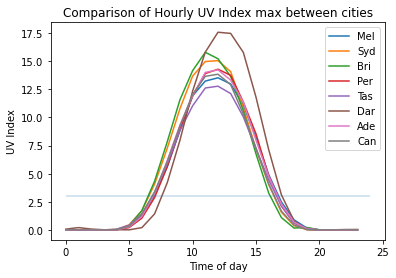

In [25]:
plt.plot(combined1_df['hour'], combined1_df['Mel'], label="Mel") 
plt.plot(combined1_df['hour'], combined1_df['Syd'], label="Syd")
plt.plot(combined1_df['hour'], combined1_df['Bris'], label="Bri")
plt.plot(combined1_df['hour'], combined1_df['Per'], label="Per")
plt.plot(combined1_df['hour'], combined1_df['Tas'], label='Tas')
plt.plot(combined1_df['hour'], combined1_df['Dar'], label='Dar')
plt.plot(combined1_df['hour'], combined1_df['Ade'], label='Ade')
plt.plot(combined1_df['hour'], combined1_df['Can'], label='Can')
plt.xlabel("Time of day")
plt.ylabel("UV Index")
plt.title("Comparison of Hourly UV Index max between cities")
plt.legend()
plt.hlines(3, 0, 24, alpha=0.25)
plt.savefig("Images/ResultsHourlyMaxUV.png")
plt.show()

As we can see from the graph above, between 10am to 3pm is when the UV is at its highest point for the cities.
Darwin recorded the highest UV index in this 5 year period whilst Tasmania recorded the lowest max.
Not only Darwin recorded the highest UV, it also recorded higher UV for more times of the day compared to the other cities. 